<a href="https://colab.research.google.com/github/DikshaNarang20/Prediction-of-CO2-solubility-using-AIML-techniques/blob/main/CO2_solubility_GPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/Data.csv')


In [ ]:
# Splitting the data into features (X) and target variable (y)
X = data[['x1', 'x2', 'x3', 'x4']]
y = data['y']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initializing the Gaussian Process Regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

In [ ]:
# Fitting the model with the training data
gpr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, random_state=42)

In [ ]:
# Making predictions on the testing set
predictions = gpr.predict(X_test)


In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 0.41421921380869553
R-squared: -6.101546497199989


In [ ]:

threshold = 0.1  # Define your acceptable threshold here

# Calculate absolute differences between predictions and actual values
absolute_diff = np.abs(predictions - y_test)

# Calculate accuracy within the defined threshold
within_threshold = np.mean(absolute_diff <= threshold)

print(f"Accuracy within {threshold}: {within_threshold * 100:.2f}%")


Accuracy within 0.1: 2.88%


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Display the computed statistics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.4142
R-squared: -6.1015
Mean Absolute Error (MAE): 0.5936


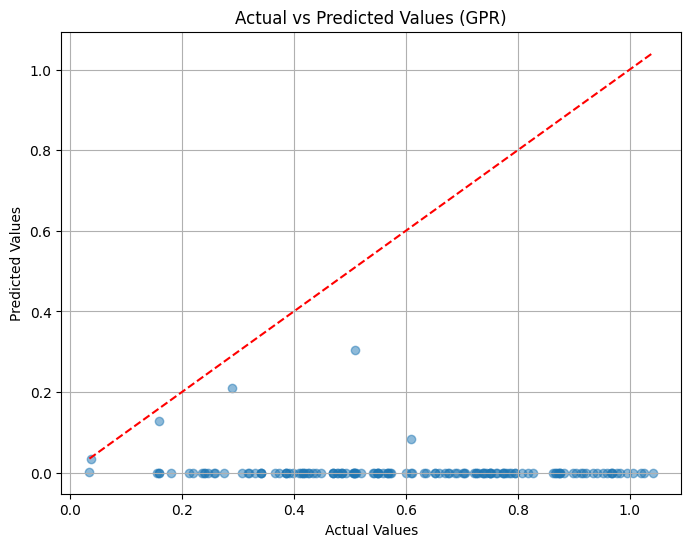

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (GPR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.grid(True)
plt.show()
